In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Read data
house_prices = pd.read_csv('data/house_prices/house_prices.csv')
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Exploration (Basic Version)

## scatter plot

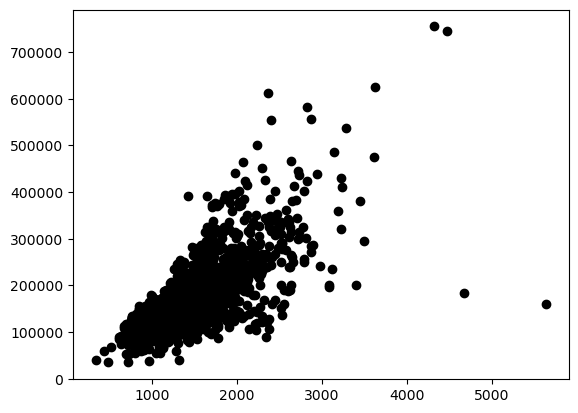

In [4]:
# GrLivArea (建筑面积) 与房价的散点图
plt.scatter(house_prices['GrLivArea'], house_prices['SalePrice'], color = ['black'])

## Correlation matrix of independent variables (multicollinearity)

<Axes: >

<Axes: >

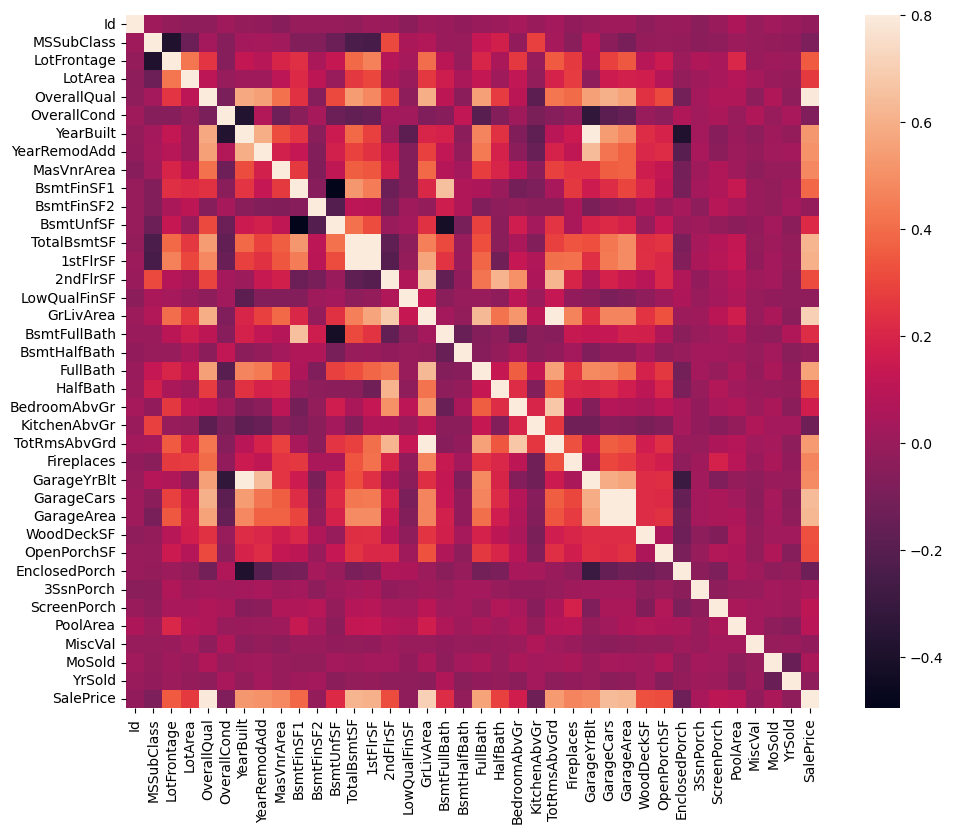

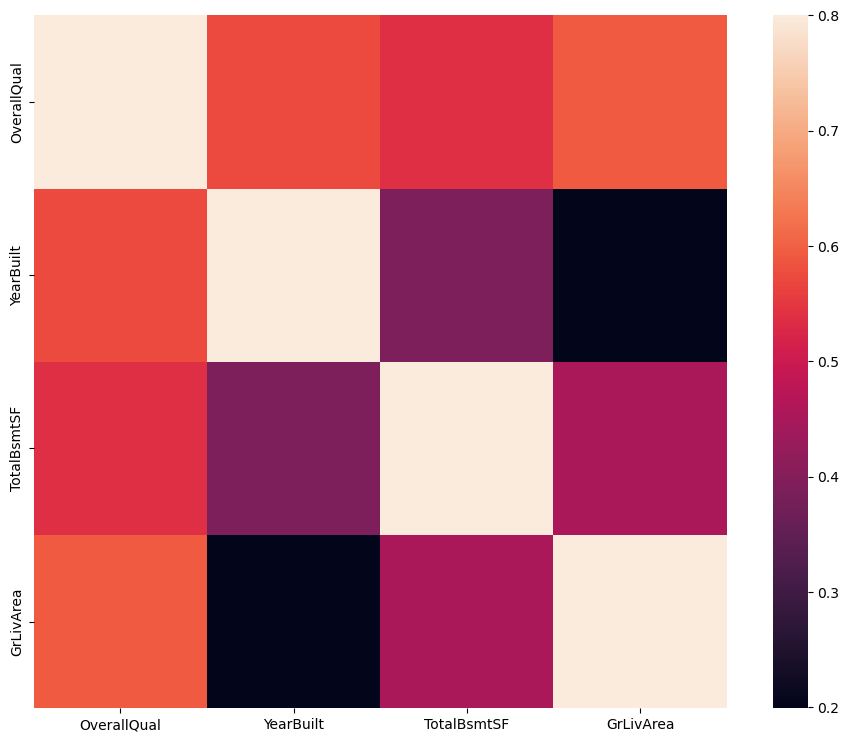

In [7]:
import seaborn as sns

numeric_cols = house_prices.select_dtypes(include = ['int64', 'float64'])
corrmat = numeric_cols.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)

# Extract some features to create a correlation matrix
house_prices2 = house_prices[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']]
corrmat2 = house_prices2.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat2, vmax = .8, square = True)

## Prepare data

In [8]:
x = house_prices[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']]
y = house_prices[['SalePrice']]

In [9]:
from sklearn import model_selection
train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size = 0.3, random_state = 123456)

train_x.head()
train_y.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea
937,7,2005,1113,1971
1128,7,2004,847,1959
1145,5,1928,1042,1576
35,8,2004,1117,2452
729,4,1925,780,1208


,SalePrice
937,253000
1128,215000
1145,149000
35,309000
729,103000


# Training regression models -- ordinary linear regression

In [10]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
regr.score(train_x, train_y)

print('Coefficients: \n', regr.coef_)
print('intercept: \n', regr.intercept_)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


0.7441208013088649

Coefficients: 
 [[22926.39155294   464.33908046    27.59864637    51.01080491]]
intercept: 
 [-980703.91475853]


# Ridge regression (L2 regularization)

In [11]:
ridgereg = linear_model.Ridge()
ridgereg.fit(train_x, train_y)
ridgereg.score(train_x, train_y)

print('Coefficients: \n', regr.coef_)
print('intercept: \n', regr.intercept_)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


0.7441206983719304

Coefficients: 
 [[22926.39155294   464.33908046    27.59864637    51.01080491]]
intercept: 
 [-980703.91475853]


# Lasso regression (L1 regularization)

In [12]:
lassoreg = linear_model.Lasso()
lassoreg.fit(train_x, train_y)
lassoreg.score(train_x, train_y)

print('Coefficients: \n', regr.coef_)
print('intercept: \n', regr.intercept_)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


0.7441208011154725

Coefficients: 
 [[22926.39155294   464.33908046    27.59864637    51.01080491]]
intercept: 
 [-980703.91475853]


# Prediction

In [13]:
pred_y = regr.predict(test_x)

test_y['pred_y'] = pred_y
pred = pd.concat([test_x, test_y], axis = 1)
pred.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice,pred_y
590,7,2004,770,1582,185900,212266.394413
1080,6,1971,1258,1258,145000,170957.451844
1419,6,1969,1844,1844,223000,216093.912131
488,5,1900,954,2414,160000,165641.487553
975,7,2000,673,1382,165000,197529.808412
